In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def plot_transformation(points, transformed_points):
    colors_1 = ['rx', 'gx', 'bx', 'yx', 'cx']
    colors_2 = ['ro', 'go', 'bo', 'yo', 'co']

    fig = plt.figure()

    # this tripped me up for a while. make sure the aspect ratio is equal
    plt.axis('equal')
    plt.grid(True)

    # Plot the original points
    for i in range(len(points) - 1):
        plt.plot(points[i][0], points[i][1], colors_1[i], label=f'p {i}')

    

    # Plot the transformed points
    for i in range(len(transformed_points) - 1):
        plt.plot(transformed_points[i][0], transformed_points[i][1], colors_2[i], label=f'p\' {i}')

    # Connect the original points to the transformed points
    for i in range(len(points)):
        plt.plot([points[i][0], transformed_points[i][0]], [points[i][1], transformed_points[i][1]], 'k--')

    # Connect each point to form a polygon
    original_polygon = plt.Polygon(points, closed=True, fill=None, edgecolor='r')
    transformed_polygon = plt.Polygon(transformed_points, closed=True, fill=None, edgecolor='b')
    plt.gca().add_patch(original_polygon)
    plt.gca().add_patch(transformed_polygon)

# Transform the points
# transformed_points = [transform_point(p, transform_matrix) for p in points]


def affine_point_transformation(t_mat, p):
    # t_mat is a 3x3 matrix
    # p are the points and defined as x,y,z where z is usally just = 1

    return np.dot(t_mat, p)
z = 1
points = np.array([[0, 0, z], [1, 0, z], [1, 1, z], [0, 1, z], [0, 0, z]])

# Define sliders for each transformation parameter
_a = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='a')
_b = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='b')
_c = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='c')
_d = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='d')
_e = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='e')
_f = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='f')

# Display sliders
display(_a, _b, _c, _d, _e, _f)

def update_transformation_matrix(change):
    global transform_matrix
    transform_matrix = np.array([
        [_a.value, _b.value, _c.value],
        [_d.value, _e.value, _f.value],
        [0, 0, 1]
    ])
    transformed_points = [affine_point_transformation(transform_matrix, np.append(p, z))[:2] for p in points]
    transformed_points = np.array(transformed_points)
    plot_transformation(points=points, transformed_points=transformed_points)
    plt.show()

# Attach the update function to slider changes
_a.observe(update_transformation_matrix, names='value')
_b.observe(update_transformation_matrix, names='value')
_c.observe(update_transformation_matrix, names='value')
_d.observe(update_transformation_matrix, names='value')
_e.observe(update_transformation_matrix, names='value')
_f.observe(update_transformation_matrix, names='value')


transform_matrix = np.array([
    [_a.value, _b.value, _c.value],
    [_d.value, _e.value, _f.value],
    [0, 0, 1]
])

# transform_matrix = ([1,0,0],
#                     [0,1,0],
#                     [0,0,1]) # the last line should remain as [0,0,1] for an affine transformation

transformed_points = [affine_point_transformation(transform_matrix, p)[:2] for p in points]

# Ensure points and transformed_points are 2D arrays with shape (N, 2)
points = points[:, :2]
transformed_points = np.array(transformed_points)

plot_transformation(points=points, transformed_points=transformed_points)

In [79]:
# this is debugged by chatGPT

import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Create an output widget to contain the plot
output = widgets.Output()

# Create figure and axis
fig, ax = plt.subplots()
ax.axis('equal')
ax.grid(True)

def plot_transformation(points, transformed_points):
    # Clear previous plot
    ax.clear()
    ax.axis('equal')
    ax.grid(True)

    colors = ['r', 'g', 'b', 'y', 'c']

    # Plot original and transformed points with their respective labels
    for i, (p, tp) in enumerate(zip(points, transformed_points)):
        ax.plot(p[0], p[1], colors[i % len(colors)] + 'x', label=f'p {i}')
        ax.plot(tp[0], tp[1], colors[i % len(colors)] + 'o', label=f"p' {i}")
        # Connect original points to transformed points
        ax.plot([p[0], tp[0]], [p[1], tp[1]], 'k--')

    # Draw polygons for the original and transformed points
    original_polygon = plt.Polygon(points, closed=True, fill=None, edgecolor='r')
    transformed_polygon = plt.Polygon(transformed_points, closed=True, fill=None, edgecolor='b')
    ax.add_patch(original_polygon)
    ax.add_patch(transformed_polygon)

    # Display the legend and the plot
    ax.legend()
    plt.show()  # Explicitly show the plot

# Affine transformation function
def affine_point_transformation(t_mat, p):
    # Ensure point p is a 3-element vector [x, y, 1] for affine transformation
    return np.dot(t_mat, p)

points = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Define sliders for each transformation parameter
_a = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='a')
_b = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='b')
_c = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='c')
_d = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='d')
_e = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='e')
_f = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='f')

# Display sliders
display(_a, _b, _c, _d, _e, _f, output)

def update_transformation_matrix(change):
    transform_matrix = np.array([
        [_a.value, _b.value, _c.value],
        [_d.value, _e.value, _f.value],
        [0, 0, 1]
    ])
    
    # Transform the points, append [1] to each point for the affine transformation
    transformed_points = [affine_point_transformation(transform_matrix, np.append(p, 1))[:2] for p in points]
    transformed_points = np.array(transformed_points)
    
    # Plot the updated transformation in the output widget
    with output:
        output.clear_output(wait=True)  # Clear previous output
        plot_transformation(points, transformed_points)

# Attach the update function to slider changes
for slider in [_a, _b, _c, _d, _e, _f]:
    slider.observe(update_transformation_matrix, names='value')

# Initial transformation
update_transformation_matrix(None)  # Initial call to plot the initial state





FloatSlider(value=1.0, description='a', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='b', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='c', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='d', max=10.0, min=-10.0)

FloatSlider(value=1.0, description='e', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='f', max=10.0, min=-10.0)

Output()

In [82]:
# this is the above code refactored:
# code debugged by chat gpt, sort of works

import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Create an output widget to contain the plot
output = widgets.Output()



def plot_transformation(points, transformed_points):
    colors_1 = ['rx', 'gx', 'bx', 'yx', 'cx']
    colors_2 = ['ro', 'go', 'bo', 'yo', 'co']

    with output:
        # Clear the current plot
        clear_output(wait=True)
        
        plt.figure()  # Create a new figure for every plot update

        # Ensure the aspect ratio is equal
        plt.axis('equal')
        plt.grid(True)

        # Plot the original points
        for i in range(len(points) - 1):
            plt.plot(points[i][0], points[i][1], colors_1[i], label=f'p {i}')

        # Plot the transformed points
        for i in range(len(transformed_points) - 1):
            plt.plot(transformed_points[i][0], transformed_points[i][1], colors_2[i], label=f'p\' {i}')

        # Connect the original points to the transformed points
        for i in range(len(points)):
            plt.plot([points[i][0], transformed_points[i][0]], [points[i][1], transformed_points[i][1]], 'k--')

        # Connect each point to form a polygon
        original_polygon = plt.Polygon(points, closed=True, fill=None, edgecolor='r')
        transformed_polygon = plt.Polygon(transformed_points, closed=True, fill=None, edgecolor='b')
        plt.gca().add_patch(original_polygon)
        plt.gca().add_patch(transformed_polygon)

        # Display the legend
        plt.legend()
        plt.show()

# Affine transformation function
def affine_point_transformation(t_mat, p):
    # Ensure point p is a 3-element vector [x, y, 1] for affine transformation
    return np.dot(t_mat, p)

z = 1
points = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Define sliders for each transformation parameter
_a = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='a')
_b = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='b')
_c = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='c')
_d = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='d')
_e = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='e')
_f = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='f')

# Display sliders
display(_a, _b, _c, _d, _e, _f, output)  # Include the output widget in the display

def update_transformation_matrix(change):
    transform_matrix = np.array([
        [_a.value, _b.value, _c.value],
        [_d.value, _e.value, _f.value],
        [0, 0, 1]
    ])
    
    # Transform the points, append [1] to each point for the affine transformation
    transformed_points = [affine_point_transformation(transform_matrix, np.append(p, 1))[:2] for p in points]
    transformed_points = np.array(transformed_points)
    
    # Plot the updated transformation
    plot_transformation(points=points, transformed_points=transformed_points)

# Attach the update function to slider changes
_a.observe(update_transformation_matrix, names='value')
_b.observe(update_transformation_matrix, names='value')
_c.observe(update_transformation_matrix, names='value')
_d.observe(update_transformation_matrix, names='value')
_e.observe(update_transformation_matrix, names='value')
_f.observe(update_transformation_matrix, names='value')

# Initial transformation
transform_matrix = np.array([
    [_a.value, _b.value, _c.value],
    [_d.value, _e.value, _f.value],
    [0, 0, 1]
])

transformed_points = [affine_point_transformation(transform_matrix, np.append(p, 1))[:2] for p in points]
transformed_points = np.array(transformed_points)

# Plot the initial transformation
plot_transformation(points=points, transformed_points=transformed_points)





FloatSlider(value=1.0, description='a', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='b', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='c', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='d', max=10.0, min=-10.0)

FloatSlider(value=1.0, description='e', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='f', max=10.0, min=-10.0)

Output()

ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (5, 3)

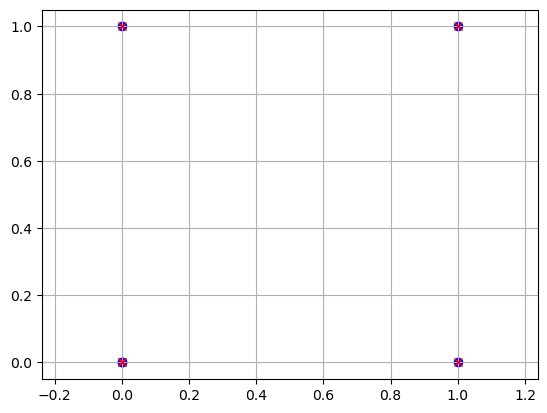

In [91]:
# debugged with chat gpt

from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib  widget
%matplotlib inline

COLORS = ['r', 'g', 'b', 'y', 'c']  # Colors for each point
Z = 1

fig, ax = plt.subplots()
ax.axis('equal')
ax.grid(True)

# Original points of the square
original_points = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Identity matrix for initial transformation
transform_matrix_i = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

def affine_point_transformation(t_mat: np.array, p: np.array) -> np.array:
    '''returns transformed point in cartision form: (x,y)'''
    return np.dot(t_mat, p)/np.dot(t_mat[-1], p)

# Initial plot setup
points = original_points
transformed_points = np.array([affine_point_transformation(transform_matrix_i, np.append(p, Z)) for p in points])

# Create scatter plot for transformed points
scat = ax.scatter(transformed_points[:, 0], transformed_points[:, 1], color='b')

# Plot original points as red 'x'
ax.plot(points[:, 0], points[:, 1], 'rx', label='Original Points')

# Lines connecting original and transformed points
lines = [ax.plot([points[i, 0], transformed_points[i, 0]], 
                 [points[i, 1], transformed_points[i, 1]], 'k--')[0] for i in range(len(points))]

# Create polygons for original and transformed shapes
original_polygon = plt.Polygon(points, closed=True, fill=None, edgecolor='r')
transformed_polygon = plt.Polygon(transformed_points, closed=True, fill=None, edgecolor='b')
ax.add_patch(original_polygon)
transformed_patch = ax.add_patch(transformed_polygon)

# Update function for updating the transformation and redrawing
def update(a_: float, b_: float, c_: float, d_: float, e_: float, f_: float) -> None:
    # Create new transformation matrix
    new_transform_matrix = np.array([
        [a_, b_, c_],
        [d_, e_, f_],
        [0, 0, 1]
    ])
    figu, axe = plt.subplots()
    # figu = plt.figure
    # axe = fig.add_subplot(111) # can add projection = '3d'
    # Compute transformed points
    points_prime = np.array([affine_point_transformation(new_transform_matrix, np.append(p, Z)) for p in points])
    x_points = (points_prime[:, 0])
    y_points = (points_prime[:, 1])
    
    # Update scatter plot with transformed points
    axe.scatter(x_points, y_points)

    # Update lines connecting original points to transformed points
    # for i, line in enumerate(lines):
    #     line.set_data([points[i, 0], points_prime[i, 0]], [points[i, 1], points_prime[i, 1]])

    # Remove old transformed polygon and draw the new one
    # global transformed_patch
    transformed_patch.remove()
    transformed_patch = plt.Polygon(points_prime, closed=True, fill=None, edgecolor='b')
    ax.add_patch(transformed_patch)

    # Redraw the canvas
    plt.draw()

# Create interactive sliders
a_ = FloatSlider(value=1, min=-10, max=10, step=0.1, description='a')
b_ = FloatSlider(value=0, min=-10, max=10, step=0.1, description='b')
c_ = FloatSlider(value=0, min=-10, max=10, step=0.1, description='c')
d_ = FloatSlider(value=0, min=-10, max=10, step=0.1, description='d')
e_ = FloatSlider(value=1, min=-10, max=10, step=0.1, description='e')
f_ = FloatSlider(value=0, min=-10, max=10, step=0.1, description='f')

# Create an interactive widget to update the transformation
interact(update, a_=a_, b_=b_, c_=c_, d_=d_, e_=e_, f_=f_)
plt.show()
